In [45]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random

# Q1 -a: Erdos Renyi


In [8]:
def create_ER_random_graph(n=10,p=0.5):
    G = nx.Graph()
    #Now add 'n' nodes:
    G.add_nodes_from(range(n))
    #create a list of all edges:
    edges = [(u,v) for u in range(n) for v in range(n)]
    for e in edges:
        if random.random() <= p:
            G.add_edge(*e)
    return G


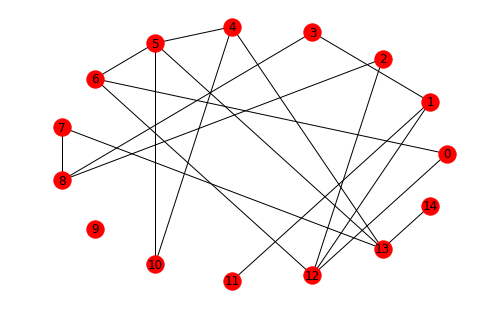

In [169]:
G = create_ER_random_graph(n=15,p=0.1)
nx.draw_circular(G, with_labels=True)

# Q1 -b: Small World Model

In [146]:
def create_small_world_random_graph(n=10,k=2,p=0.5):
    G = nx.Graph()
    #Now add 'n' nodes:
    G.add_nodes_from(range(n))
    #create a set of all edges:
    optional_edges = {(u,v) for u in range(n) for v in range(n) if u!=v}
    chosen_edges = set()
    #Step 1
    for i in range(n):
        for j in range(k/2+1):
            for sign in [-1,1]:
                #Add the closest neighbours
                G.add_edge(i,(i+sign*j)%n)
                #Add those edges to the chosen_edges set:
                chosen_edges.add((i,(i+sign*j)%n))
                #Remove those edges from the optional_edges set:
                optional_edges.discard((i,(i+sign*j)%n))
    #nx.draw(G, with_labels=True)
    chosen_edges_list =list(chosen_edges)
    #Step 2
    for c_edge in chosen_edges:
        if random.random() <= p:
            if G.has_edge(*c_edge):
                G.remove_edge(*c_edge)
            opposite_edge = (c_edge[1],c_edge[0])
            if G.has_edge(*opposite_edge):
                G.remove_edge(*opposite_edge)
            new_edge = random.choice(filter(lambda x: x[0]==c_edge[0],optional_edges))
            G.add_edge(*new_edge)
    return G

(13, 10)
(9, 9)
(10, 10)
(1, 14)
(11, 13)


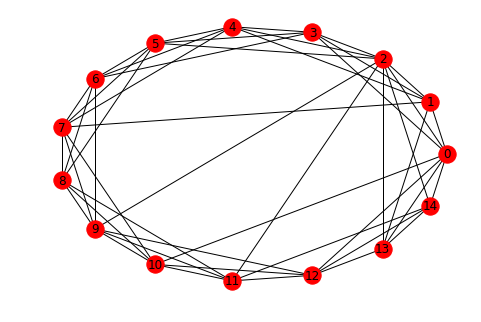

In [161]:
G = create_small_world_random_graph(n=15,p=0.02,k=6)
nx.draw_circular(G, with_labels=True)